Ido Hadanny 034537969

Bar Dagan 303026454         

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [79]:
def cauchy_pdf(x, a, b):
    return 1/(np.pi*b)*1/(1+((x-a)/b)**2)

In [80]:
def cauchy_cdf(x, a, b):
    return np.arctan((x-a)/b)/np.pi + 1/2

In [81]:
a, b = 3, 10

In [82]:
x = np.arange(-20, 20, 0.01)

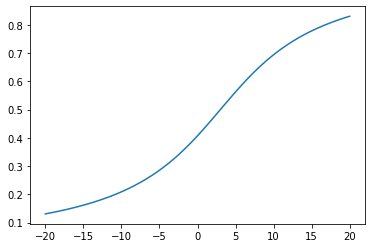

In [83]:
plt.plot(x, cauchy_cdf(x, a, b))
plt.show()

In [84]:
def inv_cauchy_cdf(y, a, b):
    return b*np.tan(np.pi*(y-0.5))+a


In [85]:
for x_i in x:
    assert np.isclose(x_i, inv_cauchy_cdf(cauchy_cdf(x_i, a, b), a, b))

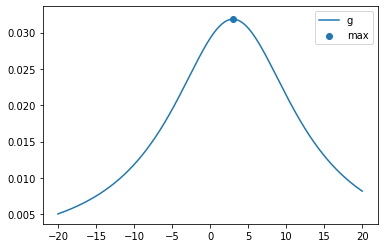

In [87]:
plt.plot(x, cauchy_pdf(x, a, b), label='g')
plt.scatter([a], [1/(np.pi*b)], label='max')
plt.legend()
plt.show()


In [88]:
def sample_cauchy(a, b):
    y = np.random.uniform()
    return inv_cauchy_cdf(y, a, b)

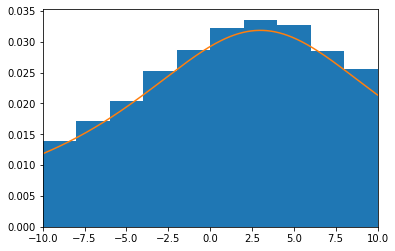

In [89]:
ys = [sample_cauchy(a,b) for _ in range(100000)]
plt.hist(ys, range=(-100, 100), bins=100, density=True)
plt.plot(x, g(x, a, b), label='g')
plt.xlim(-10, 10)
plt.show()

In [133]:
def gamma_pdf(x, alpha, beta):
    return x**(alpha-1)*np.exp(-x*beta)

In [134]:
def sample_gamma(alpha, beta):
    a=(alpha-1)/beta
    b=np.sqrt(2*alpha)/beta
    k=np.pi*b*((alpha-1)/(beta*np.e))**(alpha-1)
    x = sample_cauchy(a,b)
    if x < 0:
        return None
    ratio = gamma_pdf(x, alpha, beta)/k*cauchy_pdf(x, a, b)
    if np.random.uniform() < ratio:
        return x
    else:
        return None

In [135]:
alpha, beta = 5, 1

357


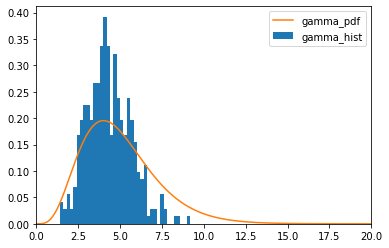

In [145]:
ys2 = [sample_gamma(alpha, beta) for _ in range(100000)]
ys2 = [v for v in ys2 if v is not None]
print(len(ys2))
plt.hist(ys2, range=(0, 20), bins=100, density=True, label='gamma_hist')
plt.xlim(0, 20)
x=np.arange(0, 20, 0.01)
plt.plot(x, gamma_pdf(x, alpha, beta)/math.factorial(alpha-1), label='gamma_pdf')
plt.legend()
plt.show()